# EDA enriquesido

### Librerias

In [108]:
import os
import requests
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

os.chdir('c:/Users/artur/OneDrive/Documents/TrabajoTesis') 

In [109]:
df = pd.read_csv("Bases/faenas_with_accessibility.csv")

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RutEmpresa                  2116 non-null   object 
 1   NombreEmpresa               2116 non-null   object 
 2   CategoriaFaena              2116 non-null   object 
 3   ProvinciaInstalacion        2116 non-null   object 
 4   ComunaInstalacion           2116 non-null   object 
 5   IdTipoInstalacion           2116 non-null   int64  
 6   TipoInstalacion             2116 non-null   object 
 7   RecursoPrimarioInstalacion  2116 non-null   object 
 8   Cota                        2116 non-null   int64  
 9   Huso                        2116 non-null   int64  
 10  IdEstado                    2116 non-null   int64  
 11  Estado                      2116 non-null   object 
 12  Latitud                     2116 non-null   float64
 13  Longitud                    2116 

### Limpieza

In [111]:
drop = ['Lon_Puerto_cercana', 'Lat_Puerto_cercana', 'Dist_Puerto_km','Puerto_cercana','Dist_Estacion_km','Lon_Estacion_cercana','Lat_Estacion_cercana','Estacion_cercana','Dist_Desalinadora_km','Lon_Desalinadora_cercana','Lat_Desalinadora_cercana','Desalinadora_cercana']
df = df.drop(columns=drop)

In [112]:
df = df.rename(columns={'TravelTime_Truck_min': 'TimeCiudad', 'DriveTime_Desalinadora_min': 'TimeDesal', 'DriveTime_Estacion_min': 'TimeEstacion', 'DriveTime_Puerto_min': 'TimePuerto'})

In [113]:
df.head()

,RutEmpresa,NombreEmpresa,CategoriaFaena,ProvinciaInstalacion,ComunaInstalacion,IdTipoInstalacion,TipoInstalacion,RecursoPrimarioInstalacion,Cota,Huso,IdEstado,Estado,Latitud,Longitud,Closest_City,TimeCiudad,TimeDesal,TimeEstacion,TimePuerto
0,76043345-4,SCM CAMARONES,CATEGORIA D,ARICA,ARICA,8073,CANCHA DE ACOPIO,COBRE,181,19,12,ABANDONADA,-18.766115,-70.305866,Arica,64.160000,62.835000,63.476667,569.841667
1,10267925-3,OMAR MUÑOZ ALVAREZ,CATEGORIA D,CHOAPA,CANELA,1291,MINA SUBTERRANEA,COBRE,1100,19,8,ACTIVA,-31.187356,-71.307579,Coquimbo,186.573333,126.293333,204.753333,964.756667
2,76828678-7,MINERA JESSICA PAMELA PEREZ SILVA EIRL,CATEGORIA D,PETORCA,CABILDO,8076,EXPLORACIÓN SUBTERRÁNEA,COBRE,475,19,8,ACTIVA,-32.413654,-70.932892,Valparaíso,140.648333,102.423333,103.946667,1042.293333
3,76102677-1,MINERA HMC S.A.,CATEGORIA A,ANTOFAGASTA,MEJILLONES,1350,TALLERES Y MAESTRANZA,COBRE,765,19,8,ACTIVA,-22.676943,-70.189357,Antofagasta,132.145000,3.201667,133.496667,86.495000
4,12774379-7,JULIO CESAR CONTRERAS ELGUETA,CATEGORIA D,SAN FELIPE,CATEMU,1306,PLANTA EXTRACCIÓN POR SOLVENTES,COBRE,789,19,12,ABANDONADA,-32.682402,-70.976678,Valparaíso,116.875000,118.035000,38.565000,1076.221667


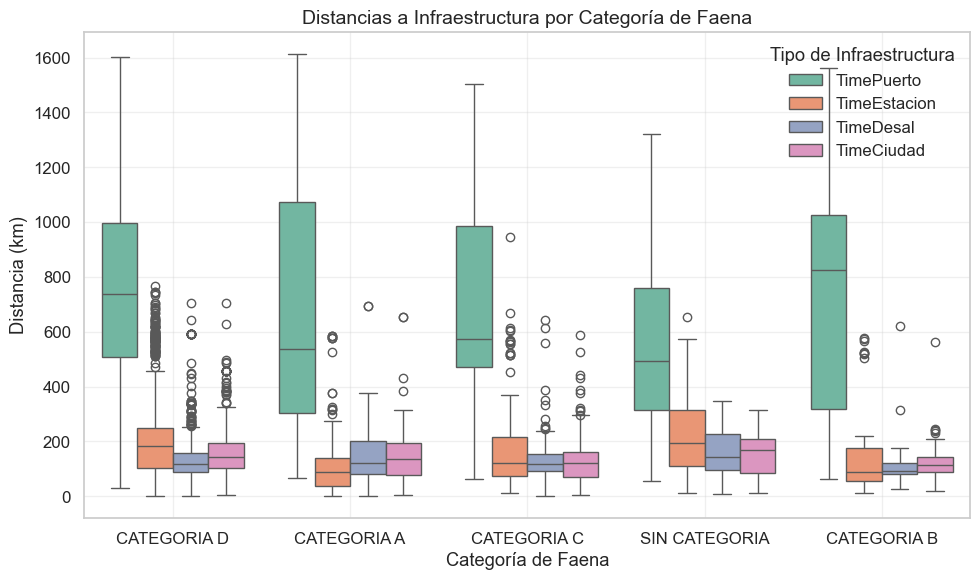

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Si tu DataFrame se llama df ---
dist_cols = ['TimePuerto', 'TimeEstacion', 'TimeDesal','TimeCiudad']

# Transformamos a formato largo para graficar fácilmente
df_melt = df.melt(
    id_vars='CategoriaFaena',
    value_vars=dist_cols,
    var_name='Tipo_Distancia',
    value_name='Distancia_km'
)

# Mejorar nombres de variables para el gráfico
df_melt['Tipo_Distancia'] = df_melt['Tipo_Distancia'].replace({
    'Dist_Puerto_km': 'Puerto',
    'Dist_Estacion_km': 'Estación',
    'Dist_Desalinadora_km': 'Desaladora'
})

# --- Gráfico ---
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_melt,
    x='CategoriaFaena',
    y='Distancia_km',
    hue='Tipo_Distancia',
    palette='Set2'
)

plt.title('Distancias a Infraestructura por Categoría de Faena', fontsize=14)
plt.xlabel('Categoría de Faena')
plt.ylabel('Distancia (km)')
plt.legend(title='Tipo de Infraestructura')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === CONFIGURACIÓN ===
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")

# Variables de distancia
dist_cols = ['TimePuerto', 'TimeEstacion', 'TimeDesal','TimeCiudad']

# Si no tienes la columna 'RegionInstalacion', puedes crearla con un mapeo:
# df['RegionInstalacion'] = df['ProvinciaInstalacion'].map(diccionario_provincia_region)

# Pasar a formato largo para graficar
df_melt = df.melt(
    id_vars=['RegionInstalacion', 'ProvinciaInstalacion'],
    value_vars=dist_cols,
    var_name='Tipo_Distancia',
    value_name='Distancia_km'
)

# Renombrar las variables para mayor legibilidad
df_melt['Tipo_Distancia'] = df_melt['Tipo_Distancia'].replace({
    'Dist_Puerto_km': 'Puerto',
    'Dist_Estacion_km': 'Estación',
    'Dist_Desalinadora_km': 'Desaladora'
})

# === GRAFICAR UN BOXPLOT POR CADA REGIÓN ===
regiones = df_melt['RegionInstalacion'].unique()

for region in regiones:
    subset = df_melt[df_melt['RegionInstalacion'] == region]
    
    plt.figure(figsize=(12,6))
    sns.boxplot(
        data=subset,
        x='ProvinciaInstalacion',
        y='Distancia_km',
        hue='Tipo_Distancia',
        showfliers=True,   # Muestra outliers (puntos extremos)
        linewidth=1.2
    )
    
    plt.title(f'Distribución de Distancias a Infraestructura — Región de {region}', fontsize=15)
    plt.xlabel('Provincia')
    plt.ylabel('Distancia (km)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Tipo de Infraestructura', loc='upper right')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()



NameError: name 'diccionario_provincia_region' is not defined

In [ ]:
df2 = pd.read_excel("Cluster/Faenas25.xlsx")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28319 entries, 0 to 28318
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RutEmpresa                   28319 non-null  object 
 1    NombreEmpresa               28319 non-null  object 
 2    RegionFaena                 28319 non-null  object 
 3    ProvinciaFaena              28319 non-null  object 
 4    ComunaFaena                 28319 non-null  object 
 5    NombreFaena                 28319 non-null  object 
 6    CategoriaFaena              28319 non-null  object 
 7    IdFaena                     28319 non-null  int64  
 8    RegionInstalacion           28319 non-null  object 
 9    ProvinciaInstalacion        28319 non-null  object 
 10   ComunaInstalacion           28319 non-null  object 
 11   NombreInstalacion           28319 non-null  object 
 12   IdTipoInstalacion           28319 non-null  int64  
 13   TipoInstalacion

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import BallTree

# --- Ensure numeric coordinates in df ---
df["Latitud"] = df["Latitud"].astype(str).str.replace(",", ".").astype(float)
df["Longitud"] = df["Longitud"].astype(str).str.replace(",", ".").astype(float)

# --- Copy and clean df2 (Cluster/Faenas25) ---
Cluster = df2.copy()
Cluster.columns = Cluster.columns.str.strip()  # remove leading/trailing spaces
Cluster["Latitud"] = Cluster["Latitud"].astype(str).str.replace(",", ".").astype(float)
Cluster["Longitud"] = Cluster["Longitud"].astype(str).str.replace(",", ".").astype(float)

# --- Build BallTree for nearest neighbor search ---
earth_radius = 6371  # km
tree = BallTree(np.deg2rad(Cluster[["Latitud", "Longitud"]].values), metric="haversine")

# --- Find nearest Cluster/Faenas25 point for each df row ---
distances, indices = tree.query(np.deg2rad(df[["Latitud", "Longitud"]].values), k=1)

# --- Add corresponding RegionInstalacion from Cluster/Faenas25 ---
df["RegionInstalacion"] = Cluster.iloc[indices.flatten()]["RegionInstalacion"].values

# --- (Optional) add distance in km to check matching accuracy ---
df["DistanciaCluster_km"] = distances.flatten() * earth_radius

print("✅ Región asignada a cada faena según el punto más cercano del Cluster/Faenas25")
print("Distancia promedio (km):", round(df["DistanciaCluster_km"].mean(), 2))
print("Distancia máxima (km):", round(df["DistanciaCluster_km"].max(), 2))




✅ Región asignada a cada faena según el punto más cercano del Cluster/Faenas25
Distancia promedio (km): 0.0
Distancia máxima (km): 0.0


In [ ]:
df = df.drop(columns=["DistanciaCluster_km"])
df.head()

,RutEmpresa,NombreEmpresa,CategoriaFaena,ProvinciaInstalacion,ComunaInstalacion,IdTipoInstalacion,TipoInstalacion,RecursoPrimarioInstalacion,Cota,Huso,IdEstado,Estado,Latitud,Longitud,Closest_City,TimeCiudad,TimeDesal,TimeEstacion,TimePuerto,RegionInstalacion
0,76043345-4,SCM CAMARONES,CATEGORIA D,ARICA,ARICA,8073,CANCHA DE ACOPIO,COBRE,181,19,12,ABANDONADA,-18.766115,-70.305866,Arica,64.160000,62.835000,63.476667,569.841667,ARICA Y PARINACOTA
1,10267925-3,OMAR MUÑOZ ALVAREZ,CATEGORIA D,CHOAPA,CANELA,1291,MINA SUBTERRANEA,COBRE,1100,19,8,ACTIVA,-31.187356,-71.307579,Coquimbo,186.573333,126.293333,204.753333,964.756667,COQUIMBO
2,76828678-7,MINERA JESSICA PAMELA PEREZ SILVA EIRL,CATEGORIA D,PETORCA,CABILDO,8076,EXPLORACIÓN SUBTERRÁNEA,COBRE,475,19,8,ACTIVA,-32.413654,-70.932892,Valparaíso,140.648333,102.423333,103.946667,1042.293333,VALPARAISO
3,76102677-1,MINERA HMC S.A.,CATEGORIA A,ANTOFAGASTA,MEJILLONES,1350,TALLERES Y MAESTRANZA,COBRE,765,19,8,ACTIVA,-22.676943,-70.189357,Antofagasta,132.145000,3.201667,133.496667,86.495000,ANTOFAGASTA
4,12774379-7,JULIO CESAR CONTRERAS ELGUETA,CATEGORIA D,SAN FELIPE,CATEMU,1306,PLANTA EXTRACCIÓN POR SOLVENTES,COBRE,789,19,12,ABANDONADA,-32.682402,-70.976678,Valparaíso,116.875000,118.035000,38.565000,1076.221667,VALPARAISO


In [ ]:
# Correlation table (Pearson) for numeric columns in df
corr_df = df[numeric_cols].corr(method='pearson').round(2)
corr_df

In [ ]:
cols_tiempo = ["TimeDesal", "TimeEstacion", "TimePuerto", "TimeCiudad"]
promedios_tiempo_por_region = (
    df.groupby("RegionInstalacion")[cols_tiempo]
      .mean()
      .round(2)
      .sort_index()
)
promedios_tiempo_por_region

promedios_tiempo_por_region_empresa = (
    df.groupby(["RegionInstalacion", "NombreEmpresa"])[cols_tiempo]
      .mean()
      .round(2)
      .sort_index()
)
promedios_tiempo_por_region_empresa

TimeDesal  \
RegionInstalacion NombreEmpresa                                             
 ANTOFAGASTA      ALASKA MINERALS SPA                              187.99   
                  ALEJANDRA MUÑOZ ASTETE                           120.03   
                  ALFREDO ALMENDARES GONZALEZ                      191.54   
                  AMARO EDUARDO MUÑOZ ALVAREZ MINERIA E.I.R.L.      40.29   
                  AMARO MUÑOZ ALVAREZ                              226.31   
...                                                                   ...   
 VALPARAISO       VGA MINING AND MINERALS LTDA.                     83.98   
                  VICTOR AMAR DIAZ                                 129.91   
                  VICTOR CONTRERAS OJEDA                           127.28   
                  VICTOR MANUEL BRUNA BUSTAMANTE                   105.95   
                  VISION MINERALS SPA.                             187.00   

                                                                TimeEstacion  \
RegionInstalacion NombreEmpresa                                                
 ANTOFAGASTA      ALASKA MINERALS SPA                                 210.08   
                  ALEJANDRA MUÑOZ ASTETE                              142.12   
                  ALFREDO ALMENDARES GONZALEZ                         220.82   
                  AMARO EDUARDO MUÑOZ ALVAREZ MINERIA E.I.R.L.         19.60   
                  AMARO MUÑOZ ALVAREZ                                 272.61   
...                                                                      ...   
 VALPARAISO       VGA MINING AND MINERALS LTDA.                        66.53   
                  VICTOR AMAR DIAZ                                     51.88   
                  VICTOR CONTRERAS OJEDA                               94.22   
                  VICTOR MANUEL BRUNA BUSTAMANTE                       86.44   
                  VISION MINERALS SPA.                                188.52   

                                                                TimePuerto  \
RegionInstalacion NombreEmpresa                                              
 ANTOFAGASTA      ALASKA MINERALS SPA                               338.87   
                  ALEJANDRA MUÑOZ ASTETE                            338.07   
                  ALFREDO ALMENDARES GONZALEZ                       215.26   
                  AMARO EDUARDO MUÑOZ ALVAREZ MINERIA E.I.R.L.       83.12   
                  AMARO MUÑOZ ALVAREZ                               250.03   
...                                                                    ...   
 VALPARAISO       VGA MINING AND MINERALS LTDA.                    1023.85   
                  VICTOR AMAR DIAZ                                 1088.10   
                  VICTOR CONTRERAS OJEDA                           1067.15   
                  VICTOR MANUEL BRUNA BUSTAMANTE                   1045.82   
                  VISION MINERALS SPA.                             1126.86   

                                                                TimeCiudad  
RegionInstalacion NombreEmpresa                                             
 ANTOFAGASTA      ALASKA MINERALS SPA                               293.70  
                  ALEJANDRA MUÑOZ ASTETE                            225.74  
                  ALFREDO ALMENDARES GONZALEZ                       156.93  
                  AMARO EDUARDO MUÑOZ ALVAREZ MINERIA E.I.R.L.       22.18  
                  AMARO MUÑOZ ALVAREZ                               191.70  
...                                                                    ...  
 VALPARAISO       VGA MINING AND MINERALS LTDA.                     122.21  
                  VICTOR AMAR DIAZ                                   93.40  
                  VICTOR CONTRERAS OJEDA                            165.51  
                  VICTOR MANUEL BRUNA BUSTAMANTE                    143.22  
                  VISION MINERALS SPA.                              225.22  

[140

In [ ]:
promedios_tiempo_por_region_empresa = (
    df.groupby(["RegionInstalacion", "NombreEmpresa"])
      .filter(lambda x: len(x) >= 5)                     # keep only groups with ≥10 datapoints
      .groupby(["RegionInstalacion", "NombreEmpresa"])[cols_tiempo]
      .mean()
      .round(2)
      .sort_index()
)

promedios_tiempo_por_region_empresa



TimeDesal  \
RegionInstalacion                     NombreEmpresa                                                 
 ANTOFAGASTA                          CORPORACION NACIONAL DEL COBRE (CODELCO)             131.99   
                                      EXPLORACIONES MINERAS ANDINAS S.A.                   164.36   
                                      GUIDO CERDA HERRERA                                  155.62   
                                      MINERA CENTINELA                                      68.70   
                                      MINERA DEL COBRE SPA                                  89.10   
                                      MINERA ESCONDIDA LTDA.                               274.00   
                                      MINERA LOS PORTALES S.A.                             146.72   
                                      SOCIEDAD CONTRACTUAL MINERA FRANKE                   217.93   
 ATACAMA                              CORPORACION NACIONAL DEL COBRE (CODELCO)             168.60   
                                      EMPRESA NACIONAL DE MINERIA (ENAMI)                   85.86   
                                      ESTEBAN TORRES ALFARO (MINERA META)                  119.28   
                                      FLORIDOR CASTILLO ARAYA                              115.84   
                                      MANTOVERDE S.A.                                       53.20   
                                      SOC. CONTRACTUAL MINERA CAROLA                       115.80   
                                      SOCIEDAD PUNTA DEL COBRE S.A.                        100.93   
 COQUIMBO                             CIA MRA SAN GERONIMO                                  81.51   
                                      CIA MRA. TECK CARMEN DE ANDACOLLO                     77.67   
                                      EMPRESA NACIONAL DE MINERIA (ENAMI)                   87.20   
                                      FMA/P                                                117.13   
 LIBERTADOR GENERAL BERNARDO OHIGGINS CORPORACION NACIONAL DEL COBRE (CODELCO)             263.89   
                                      JUAN AUGUSTO MUNIZAGA ROMAN                          524.30   
 METROPOLITANA DE SANTIAGO            ANGLO AMERICAN SUR S.A.                              165.53   
 TARAPACA                             ANDRES BELISARIO FELIU ESCUDERO                      229.89   
                                      CIA. MINERA DOÑA INES DE COLLAHUASI S.C.M.           208.50   
                                      JUAN AUGUSTO MUNIZAGA ROMAN                          230.38   
 VALPARAISO                           ANGLO AMERICAN SUR S.A.                               80.47   
                                      CIA. MINERA CERRO NEGRO S.A.                         116.65   
                                      CIA. MRA. LA PATAGUA                                  83.84   
                                      CORPORACION NACIONAL DEL COBRE (CODELCO)             170.11   
                                      DAVID ANTONIO ARACENA GODOY                           98.34   
                                      GUILLERMO ESCOBAR RIQUELME                            95.77   
                                      INVERSIONES AGROMINS S.A.                            158.46   
                                      JUAN LUIS FIGUEROA QUIROZ                            121.61   
                                      LUIS CANALES MIRANDA                                 122.31   
                                      MINERA LAS CENIZAS S.A.                               83.18   
                                      SOC. EXPLORACION Y DESARROLLO MINERO (EXPLODESA)     100.28   

                                                                                        TimeEstacion  \
RegionInstalacion                     NombreEmpresa                                                    
 ANTOFAGASTA                          COR

### Basicos

In [ ]:
print("Shape:", df.shape)
print("\n Column Names:\n", df.columns.tolist())
print("\n Info:")
print(df.info())

Shape: (2116, 20)

 Column Names:
 ['RutEmpresa', 'NombreEmpresa', 'CategoriaFaena', 'ProvinciaInstalacion', 'ComunaInstalacion', 'IdTipoInstalacion', 'TipoInstalacion', 'RecursoPrimarioInstalacion', 'Cota', 'Huso', 'IdEstado', 'Estado', 'Latitud', 'Longitud', 'Closest_City', 'TimeCiudad', 'TimeDesal', 'TimeEstacion', 'TimePuerto', 'RegionInstalacion']

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RutEmpresa                  2116 non-null   object 
 1   NombreEmpresa               2116 non-null   object 
 2   CategoriaFaena              2116 non-null   object 
 3   ProvinciaInstalacion        2116 non-null   object 
 4   ComunaInstalacion           2116 non-null   object 
 5   IdTipoInstalacion           2116 non-null   int64  
 6   TipoInstalacion             2116 non-null   object 
 7   RecursoPrima

In [ ]:
print("\n Missing Values:\n", df.isna().sum())
print("\n First Rows:\n", df.head())


 Missing Values:
 RutEmpresa                    0
NombreEmpresa                 0
CategoriaFaena                0
ProvinciaInstalacion          0
ComunaInstalacion             0
IdTipoInstalacion             0
TipoInstalacion               0
RecursoPrimarioInstalacion    0
Cota                          0
Huso                          0
IdEstado                      0
Estado                        0
Latitud                       0
Longitud                      0
Closest_City                  0
TimeCiudad                    0
TimeDesal                     0
TimeEstacion                  0
TimePuerto                    0
RegionInstalacion             0
dtype: int64

 First Rows:
    RutEmpresa                           NombreEmpresa CategoriaFaena  \
0  76043345-4                           SCM CAMARONES    CATEGORIA D   
1  10267925-3                      OMAR MUÑOZ ALVAREZ    CATEGORIA D   
2  76828678-7  MINERA JESSICA PAMELA PEREZ SILVA EIRL    CATEGORIA D   
3  76102677-1            

In [ ]:
print("\n Numeric Summary:\n", df.describe().T)
print("\n Categorical Summary:\n", df.describe(include='object').T)


 Numeric Summary:
                     count         mean          std          min          25%  \
IdTipoInstalacion  2116.0  2091.619093  2006.411564  1291.000000  1291.000000   
Cota               2116.0  1178.073251   776.897882     0.000000   680.000000   
Huso               2116.0    19.000000     0.000000    19.000000    19.000000   
IdEstado           2116.0   593.636106  1457.316741     8.000000     8.000000   
Latitud            2116.0   -28.634560     3.566150   -35.888489   -31.686987   
Longitud           2116.0   -70.570856     0.583436   -71.894104   -71.042899   
TimeCiudad         2116.0   150.439249    83.308646     3.681667    95.204167   
TimeDesal          2116.0   133.972204    80.547613     0.000000    88.004583   
TimeEstacion       2116.0   187.543854   138.133636     0.353333    89.895000   
TimePuerto         2116.0   712.686652   320.921185    29.256667   477.635417   

                           50%          75%          max  
IdTipoInstalacion  1294.00000

In [ ]:
df2 = pd.read_excel("Cluster/Faenas25.xlsx")

In [ ]:
# Limpiar nombres de columnas
df2.columns = ['RutEmpresa' if col == 'RutEmpresa' else col.lstrip() for col in df2.columns]

# Limpiar espacios dentro de las columnas (excepto RutEmpresa)
for col in df2.select_dtypes(include='object').columns:
    if col != 'RutEmpresa':
        df2[col] = df2[col].str.strip()

In [ ]:
estados = df2['Estado'].unique()
print("Estados únicos en la columna 'Estado':", estados)

Estados únicos en la columna 'Estado': ['ACTIVA' 'INACTIVA' 'ABANDONADA' 'IRREGULAR OPERATIVA' 'CIERRE TEMPORAL'
 'EXPLORACIÓN FINALIZADA' 'EN REVISIÓN DE PROYECTO'
 'PARALIZADA POR SANCION' 'PROYECTADA' 'CIERRE FINAL'
 'PARALIZACIÓN POR MEDIDA PROVISIONAL']


In [ ]:
estado_counts = df2["Estado"].value_counts().sort_values(ascending=False)
print("Cantidad por Estado en df2:")
print(estado_counts)

# Opcional: porcentajes
estado_pct = df2["Estado"].value_counts(normalize=True).mul(100).round(2)
print("\nPorcentaje por Estado (%):")
print(estado_pct)

Cantidad por Estado en df2:
Estado
ACTIVA                                 10834
ABANDONADA                             10134
IRREGULAR OPERATIVA                     2204
INACTIVA                                1508
EN REVISIÓN DE PROYECTO                 1358
EXPLORACIÓN FINALIZADA                   715
CIERRE FINAL                             577
PROYECTADA                               375
CIERRE TEMPORAL                          331
PARALIZADA POR SANCION                   242
PARALIZACIÓN POR MEDIDA PROVISIONAL       41
Name: count, dtype: int64

Porcentaje por Estado (%):
Estado
ACTIVA                                 38.26
ABANDONADA                             35.79
IRREGULAR OPERATIVA                     7.78
INACTIVA                                5.33
EN REVISIÓN DE PROYECTO                 4.80
EXPLORACIÓN FINALIZADA                  2.52
CIERRE FINAL                            2.04
PROYECTADA                              1.32
CIERRE TEMPORAL                         1.17
PARA

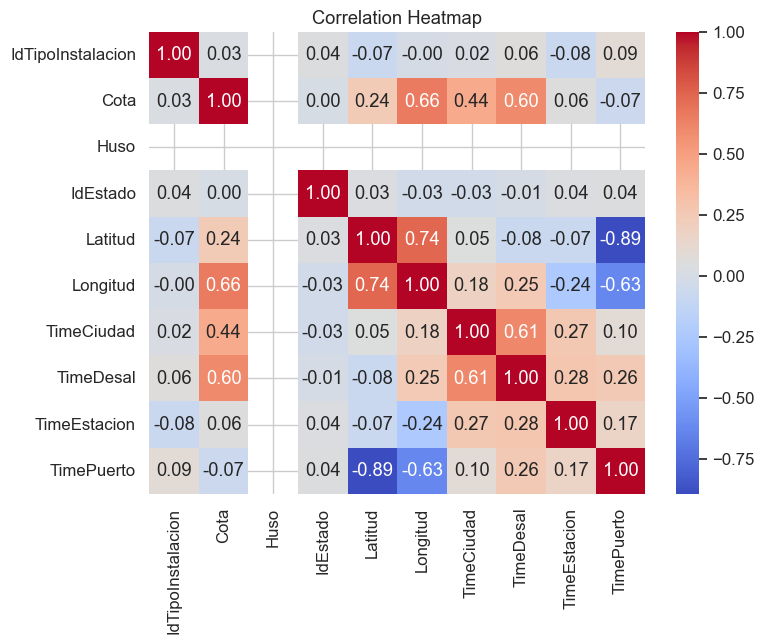

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df_desal = pd.read_csv("Bases/plantas_desaladoras_combinado_final.csv")
df_estaciones = pd.read_csv("Bases/estaciones.csv")   
df_desal["Latitud"] = df_desal["Latitude"].astype(str).str.replace(",", ".").astype(float)
df_desal["Longitud"] = df_desal["Longitude"].astype(str).str.replace(",", ".").astype(float)
df_estaciones["lat"] = df_estaciones["latitude"].astype(float)
df_estaciones["lon"] = df_estaciones["longitude"].astype(float)

In [ ]:
df_puertos = pd.read_csv("Bases/puertos.csv")

In [ ]:
import folium
from folium.plugins import MarkerCluster
import webbrowser

# Crear mapa base
map_chile = folium.Map(location=[-26.5, -70.7], zoom_start=5, tiles="CartoDB positron")

# Cluster Minas ACTIVA
active_mining_cluster = MarkerCluster(name="Minas ACTIVAS").add_to(map_chile)

for _, row in df[df["Estado"] == "ACTIVA"].iterrows():
    popup_text = (
        f"<b>Empresa:</b> {row['NombreEmpresa']}<br>"
        f"<b>Estado:</b> {row['Estado']}<br>"
        f"<b>Tipo:</b> {row['TipoInstalacion']}<br>"
        f"<b>Provincia:</b> {row['ProvinciaInstalacion']}<br>"
        f"<b>Comuna:</b> {row['ComunaInstalacion']}<br>"
        f"<b>Recurso Primario:</b> {row['RecursoPrimarioInstalacion']}"
    )
    folium.Marker(
        location=[row["Latitud"], row["Longitud"]],
        popup=popup_text,
        tooltip=row["NombreEmpresa"],
        icon=folium.Icon(color="green", icon="industry", prefix="fa"),
    ).add_to(active_mining_cluster)

# Cluster Minas NO ACTIVAS
inactive_mining_cluster = MarkerCluster(name="Minas NO ACTIVAS").add_to(map_chile)

for _, row in df[df["Estado"] != "ACTIVA"].iterrows():
    popup_text = (
        f"<b>Empresa:</b> {row['NombreEmpresa']}<br>"
        f"<b>Estado:</b> {row['Estado']}<br>"
        f"<b>Tipo:</b> {row['TipoInstalacion']}<br>"
        f"<b>Provincia:</b> {row['ProvinciaInstalacion']}<br>"
        f"<b>Comuna:</b> {row['ComunaInstalacion']}<br>"
        f"<b>Recurso Primario:</b> {row['RecursoPrimarioInstalacion']}"
    )
    folium.Marker(
        location=[row["Latitud"], row["Longitud"]],
        popup=popup_text,
        tooltip=row["NombreEmpresa"],
        icon=folium.Icon(color="red", icon="industry", prefix="fa"),
    ).add_to(inactive_mining_cluster)

# Cluster Desaladoras
desal_cluster = MarkerCluster(name="Desaladoras").add_to(map_chile)
for _, row in df_desal.iterrows():
    popup_text = (
        f"<b>Empresa:</b> {row['Empresa/Operador']}<br>"
        f"<b>Planta:</b> {row['Nombre de la Planta']}<br>"
        f"<b>Tipo:</b> {row['Tipo de Planta']}<br>"
        f"<b>Uso:</b> {row['Uso/Aplicación']}<br>"
        f"<b>Estado:</b> {row['Estado Operacional']}<br>"
        f"<b>Capacidad (L/s):</b> {row['Capacidad (Valor)']}<br>"
        f"<b>Año Puesta en Marcha:</b> {row['Año de Puesta en Marcha']}<br>"
        f"<b>Región:</b> {row['Región']}"
    )
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=popup_text,
        tooltip=row["Nombre de la Planta"],
        icon=folium.Icon(color="blue", icon="tint", prefix="fa"),
    ).add_to(desal_cluster)

# Cluster Estaciones
station_cluster = MarkerCluster(name="Estaciones Ferroviarias").add_to(map_chile)
for _, row in df_estaciones.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=f"<b>Estación:</b> {row['name']}",
        tooltip=row["name"],
        icon=folium.Icon(color="orange", icon="train", prefix="fa"),
    ).add_to(station_cluster)

# Cluster Puertos
port_cluster = MarkerCluster(name="Puertos").add_to(map_chile)
for _, row in df_puertos.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=f"<b>Puerto:</b> {row['portName']}<br><b>Tamaño:</b> {row['harborSize']}",
        tooltip=row["portName"],
        icon=folium.Icon(color="purple", icon="ship", prefix="fa"),
    ).add_to(port_cluster)

# Control de capas
folium.LayerControl(collapsed=False).add_to(map_chile)

# Guardar y abrir mapa
map_file = "mapa_completo_chile_activas.html"
map_chile.save(map_file)
webbrowser.open(map_file)


True